In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
url = "https://www.sharesansar.com/live-trading"

# Make a request to get the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Now you can work with the soup object
    # For example, print the title of the page
    print(soup.text)
else:
    print(f"Failed to retrieve the content. Status Code: {response.status_code}")








Live Trading - || ShareSansar ||






























































































Login
Register
Contact Us
FAQ
Write For Us






































 Home
                            

News


All News


Announcements



Economy


Inflation


Gold & Silver Price


GDP & Market Cap


GDP Growth & NEPSE


Weekly Deposit & Lending


Government Revenue & Expenditure


Capital Expenditure


Remittance


BFIs Deposit/Lending Growth


Short-Term Interest Rates


Budget Surplus/Deficit Status



Market


Market Overview


Live Trading


Stock Heat Map


Today's Share Price


Floorsheet


AGM / SGM


Proposed Dividend


Sectorwise Share Price


Indices / Sub-Indices


Datewise Indices


Top Brokers


NEPSE Candlestick Chart


Index History Data



IPO/FPO


Check IPO/FPO Result


IPO/FPO News


IPO/FPO Allotment News



Company


Listed Companies


Mutual Funds & NAVs


Merged Companies


Mergers & Acquisitions


Trading Suspended 

In [5]:
table_code = soup.find(id = 'headFixed')
table_code

<table class="table table-bordered table-striped table-hover dataTable compact" id="headFixed">
<thead>
<tr>
<th width="10px">S.No</th>
<th>Symbol</th>
<th class="text-center">LTP</th>
<th class="text-center">Point Change</th>
<th class="text-center">% Change</th>
<th class="text-center">Open</th>
<th class="text-center">High</th>
<th class="text-center">Low</th>
<th class="text-center">Volume</th>
<th class="text-center">Prev. Close</th>
</tr>
</thead>
<tbody>
<tr>
<td class="danger-index">
                                        1</td>
<td class="danger-index">
<a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
</td>
<td class="text-center danger-index">
                                        600.00</td>
<td class="text-center danger-index">
                                        -7.00</td>
<td class="text-center danger-index">
                                        -1.15</td>
<td class="text-center danger-index">
                                       

In [6]:
tags = table_code.find_all("tr")
tags

[<tr>
 <th width="10px">S.No</th>
 <th>Symbol</th>
 <th class="text-center">LTP</th>
 <th class="text-center">Point Change</th>
 <th class="text-center">% Change</th>
 <th class="text-center">Open</th>
 <th class="text-center">High</th>
 <th class="text-center">Low</th>
 <th class="text-center">Volume</th>
 <th class="text-center">Prev. Close</th>
 </tr>,
 <tr>
 <td class="danger-index">
                                         1</td>
 <td class="danger-index">
 <a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
 </td>
 <td class="text-center danger-index">
                                         600.00</td>
 <td class="text-center danger-index">
                                         -7.00</td>
 <td class="text-center danger-index">
                                         -1.15</td>
 <td class="text-center danger-index">
                                         607.00</td>
 <td class="text-center danger-index">
                                         6

In [7]:
data = []
for i in tags:
  y = i.text.split('\n')
  data.append(y[1:])

data

[['S.No',
  'Symbol',
  'LTP',
  'Point Change',
  '% Change',
  'Open',
  'High',
  'Low',
  'Volume',
  'Prev. Close',
  ''],
 ['',
  '                                        1',
  '',
  'ACLBSL',
  '',
  '',
  '                                        600.00',
  '',
  '                                        -7.00',
  '',
  '                                        -1.15',
  '',
  '                                        607.00',
  '',
  '                                        607.00',
  '',
  '                                        600.00',
  '',
  '                                        79.00',
  '',
  '                                        607.00',
  ''],
 ['',
  '                                        2',
  '',
  'ADBL',
  '',
  '',
  '                                        227.10',
  '',
  '                                        0.00',
  '',
  '                                        0.00',
  '',
  '                                        228.00',
  '',
  '               

In [8]:
#Cleaning the data i.e removing all null values from the data
filtered_data = [[temp for temp in sublist if temp!= ""] for sublist in data]
filtered_data

[['S.No',
  'Symbol',
  'LTP',
  'Point Change',
  '% Change',
  'Open',
  'High',
  'Low',
  'Volume',
  'Prev. Close'],
 ['                                        1',
  'ACLBSL',
  '                                        600.00',
  '                                        -7.00',
  '                                        -1.15',
  '                                        607.00',
  '                                        607.00',
  '                                        600.00',
  '                                        79.00',
  '                                        607.00'],
 ['                                        2',
  'ADBL',
  '                                        227.10',
  '                                        0.00',
  '                                        0.00',
  '                                        228.00',
  '                                        230.00',
  '                                        227.00',
  '                                     

In [9]:
import csv
file = open("stock.csv", "w")
writer = csv.writer(file)
writer.writerows(filtered_data)
file.close()

In [10]:
import pandas as pd
stock_data = pd.read_csv('stock.csv',encoding = 'latin1')
stock_data

,S.No,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
0,1,ACLBSL,600.00,-7.0,-1.15,607.00,607.00,600.00,79.00,607.00
1,2,ADBL,227.10,0.0,0.00,228.00,230.00,227.00,"2,111.00",227.10
2,3,AHL,430.30,1.3,0.30,420.60,439.00,415.00,"2,597.00",429.00
3,4,AHPC,185.00,1.0,0.54,186.00,186.00,183.00,"5,727.00",184.00
4,5,AKJCL,221.00,0.9,0.41,218.00,226.30,218.00,"12,787.00",220.10
...,...,...,...,...,...,...,...,...,...,...
255,256,UPPER,200.10,4.8,2.46,193.70,206.90,193.60,"8,618.00",195.30
256,257,USHEC,369.70,-0.3,-0.08,363.10,383.00,363.10,"2,720.00",370.00
257,258,USHL,484.20,13.2,2.80,462.10,504.00,462.10,590.00,471.00
258,259,USLB,"1,035.00",-10.0,-0.96,"1,028.00","1,035.00","1,028.00",130.00,"1,045.00"


In [36]:
import matplotlib.pyplot as plt
# Plot the Open, High, and Low values for each stock symbol
plt.figure(figsize=(24, 12))

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

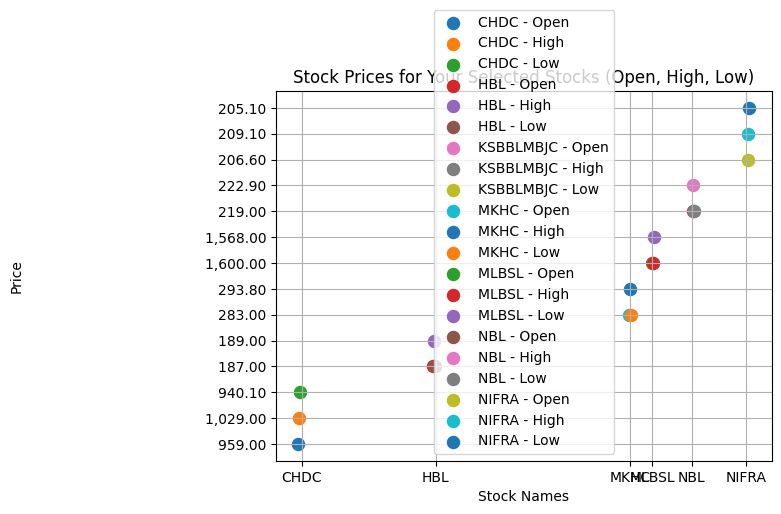

In [37]:
# List of your stock symbols
my_stocks = ['CHDC', 'HBL', 'KSBBL''MBJC', 'MKHC', 'MLBSL', 'NBL', 'NIFRA']

# Filter data for your stocks
my_stock_data = stock_data[stock_data['Symbol'].isin(my_stocks)]

for symbol in my_stocks:
    symbol_data = my_stock_data[my_stock_data['Symbol'] == symbol]
   # Bar width and positions for each stock
    bar_width = 0.25
    positions = symbol_data.index + my_stocks.index(symbol) * bar_width
    
    plt.scatter(positions - bar_width, symbol_data['Open'], label=f'{symbol} - Open', marker='o', s=75)
    plt.scatter(positions, symbol_data['High'], label=f'{symbol} - High', marker='o', s=75)
    plt.scatter(positions + bar_width, symbol_data['Low'], label=f'{symbol} - Low', marker='o', s=75)

# Set x-axis labels
plt.xticks(my_stock_data.index + (len(my_stocks) - 1) * bar_width / 2, my_stock_data['Symbol'])

plt.title('Stock Prices for Your Selected Stocks (Open, High, Low)')
plt.xlabel('Stock Names')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()